In [ ]:
!pip install kwant

     |████████████████████████████████| 1.6 MB 24.9 MB/s eta 0:00:01
  Created wheel for kwant: filename=kwant-1.4.3-cp37-cp37m-linux_x86_64.whl size=3691010 sha256=56b57c1565b290224d97839a31c41719c23e32fdfe72d74c3d3e4de970a98c73
  Stored in directory: /root/.cache/pip/wheels/d6/2d/93/6f395cd3f0798d7d9e161dce1c8b8c8bbd04d4547763c926de
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp37-cp37m-linux_x86_64.whl size=227981 sha256=05f7316c2a815bf1c9287f0c7d47beecda14bddacc4d92f49d1a83a653d2eec7
  Stored in directory: /root/.cache/pip/wheels/85/c6/1c/6939e2931cfbff5df75758a06084bf67171b640ebdf5febd35
Successfully built kwant tinyarray


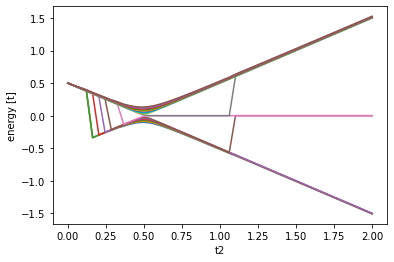

In [1]:
import kwant
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla
import scipy as scp
import numpy as np
import scipy
from kwant.physics import dispersion

def ssh_model(t_1 = 1, t_2 = 1, L = 200, return_only_ham = 1):
    
    syst = kwant.Builder()
    a = 1
    lat = kwant.lattice.chain(a)

    # Define the scattering region
    for n in range(L):
        syst[lat(n)] = 0

    # Left hopping
    for n in range(L):
        if n%2:
            syst[lat(n-1), lat(n)] = t_1

    # Right hopping
    for n in range(1,L):      
        if not n%2:
            syst[lat(n-1), lat(n)] = t_2

    #kwant.plot(syst)
    syst = syst.finalized()
    
    if(return_only_ham):
        return syst.hamiltonian_submatrix(sparse=True)
    else:
        return syst.hamiltonian_submatrix(sparse=False)

# Plots wavefunction of the system for given energy
ham = ssh_model(1, 0.5)
ham_to_show = ssh_model(1, 0.5)
#print(ham_to_show)


def plot_probability():
    k_tab = np.linspace(0, 2, 50)
    energies = []
    for t2 in k_tab:
        ham = ssh_model(0.5, t2)
        e_val, e_vec = scipy.sparse.linalg.eigsh(ham, k=16,sigma=0.01,which='LM', return_eigenvectors=True)
        e_val = np.sort(e_val)
        energies.append(e_val)
        
    plt.figure()
    plt.plot(k_tab, energies)
    plt.xlabel("t2")
    plt.ylabel("energy [t]")
    #plt.show()
        

    if(0):
        for i in range(len(e_val)):
            eigenvector = e_vec[:,i]
            #print(np.linalg.norm(e_vec[:,i]))
            prob = []
            for j in range(len(e_vec[:,i])):
                prob.append(abs(eigenvector[j])**2)
            print("Energy: ", e_val[i])
            plt.plot(np.linspace(0, L, L), prob)
            plt.show()
            
plot_probability()
plt.savefig("SSH_spectrum.pdf")